
<img src="https://i.ibb.co/1T5Wbn6/Banner-para-Linkedin-capa-de-perfil-para-programador.png"  alt="KCode Banner"  />

<a href="https://www.linkedin.com/in/kauebr/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width="30" ></a> <a href="mailto: kauemandarino@gmail.com"><img src="https://cdn-icons-png.flaticon.com/512/5968/5968534.png" width="30" ></a><a href="
https://api.whatsapp.com/send?phone=5541991835800&text=Oi"> <img src="https://imagepng.org/wp-content/uploads/2017/08/whatsapp-icone-1.png" width="30" ></a><a href="https://github.com/kauebr/"><img src="https://github.githubassets.com/images/modules/logos_page/Octocat.png" width="30" ></a>


# Apresentação Radar Financeiro K8 `02-05-2023`

## Objetivo da apresentação:

* Demonstrar andamento do projeto

## No que consiste o Radar Financeiro k8?

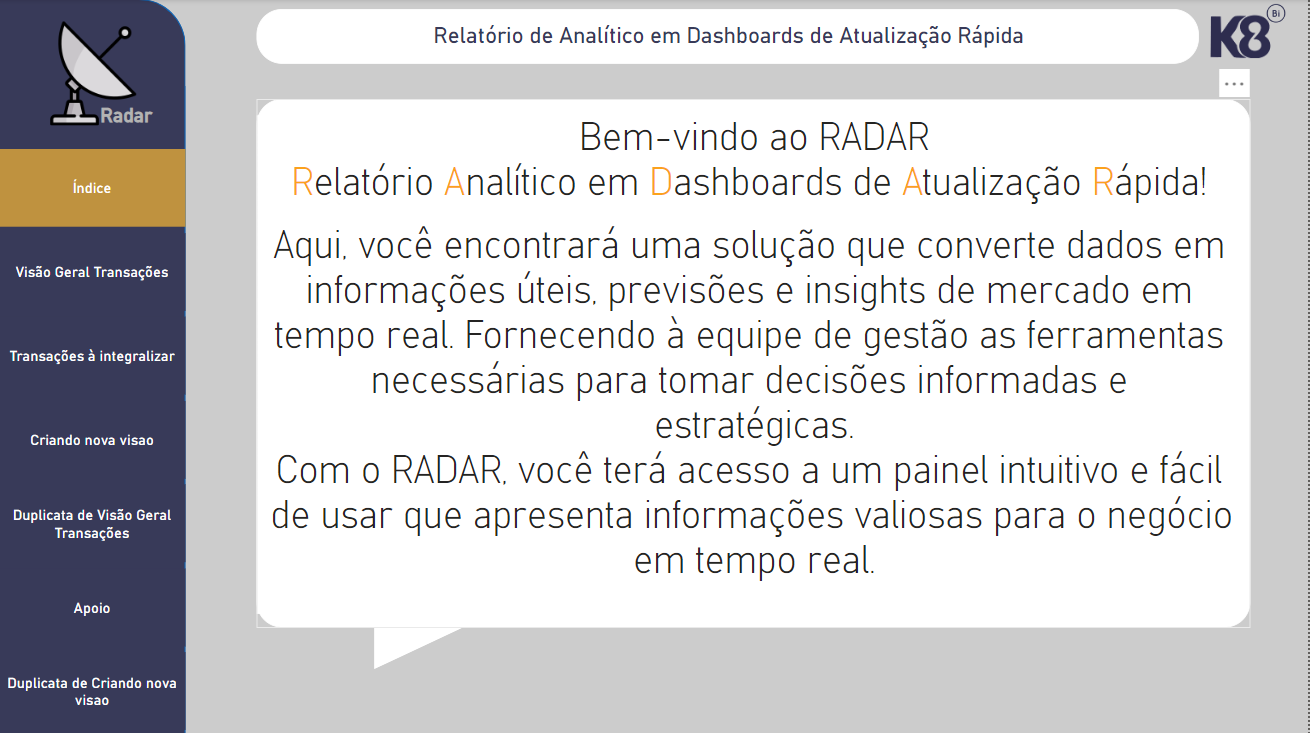


O Projeto coleta dados do banco de dados de produção, os organiza, valida e gera informações que fornecerão visibilidade em tempo real sobre o que está ocorrendo nas operações da empresa, clique aqui para ver a [descrição completa do escopo do projeto](https://k8bank-my.sharepoint.com/personal/kaue_silva_k8bank_com_br/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fkaue%5Fsilva%5Fk8bank%5Fcom%5Fbr%2FDocuments%2FProjeto%202%20%2D%20Financeiro%20Di%C3%A1rio%2FProposta%20%2D%20Metodologia%20%2D%20Incluir%20White%20Label%2Epdf&parent=%2Fpersonal%2Fkaue%5Fsilva%5Fk8bank%5Fcom%5Fbr%2FDocuments%2FProjeto%202%20%2D%20Financeiro%20Di%C3%A1rio)

Atualmente, o Projeto enfrenta um gargalo na atualização de dados, pois esses dados são extraídos manualmente por meio de SQL e colocados em uma [pasta do SharePoint](https://k8bank.sharepoint.com/sites/FileK8Cloud/Infraestrutura%20TI/Forms/AllItems.aspx?csf=1&web=1&e=iY31OC&cid=62f50950%2D56d7%2D4373%2D88c0%2Dc7d670a434ba&RootFolder=%2Fsites%2FFileK8Cloud%2FInfraestrutura%20TI%2FBanco%20de%20Dados%2FCSV%20Pay%20e%20Cobran%C3%A7a&FolderCTID=0x012000DC846C3DE9DA834E9CD1CB94E4132833). Em seguida, eu os trato, limpo, modelo e utilizo para análise por meio de ferramentas como o Power BI, estatística, inteligência artificial e Python. O ideal seria automatizar esse pipeline de dados, mas, com o tempo, chegaremos a essa solução.

Num ambiente altamente competitivo, a tecnologia é a chave para se destacar, e atualmente os dados são considerados o novo petróleo. É crucial olhar para os dados a fim de se sobressair num mercado cada vez mais acirrado. O desenvolvimento de algoritmos a partir dos dados pode aumentar significativamente a eficiência do modelo de negócio.

Artigo de apoio: https://www.harvardonline.harvard.edu/blog/how-data-science-can-benefit-your-business-decisions

Ao contrário do que muitos pensam, a ciência de dados e a inteligência de negócios (BI) são muito mais complexas do que simplesmente plotar um gráfico. Essas áreas exigem tempo para compreender o negócio, modelar e limpar os dados, criar metodologias e mapear informações. A validação é crucial e a parte visível do trabalho é apenas uma fração do todo. No entanto, todo esse esforço produz um material sólido que serve como base para tomar decisões assertivas baseadas em dados. A figura a seguir ilustra esse processo:
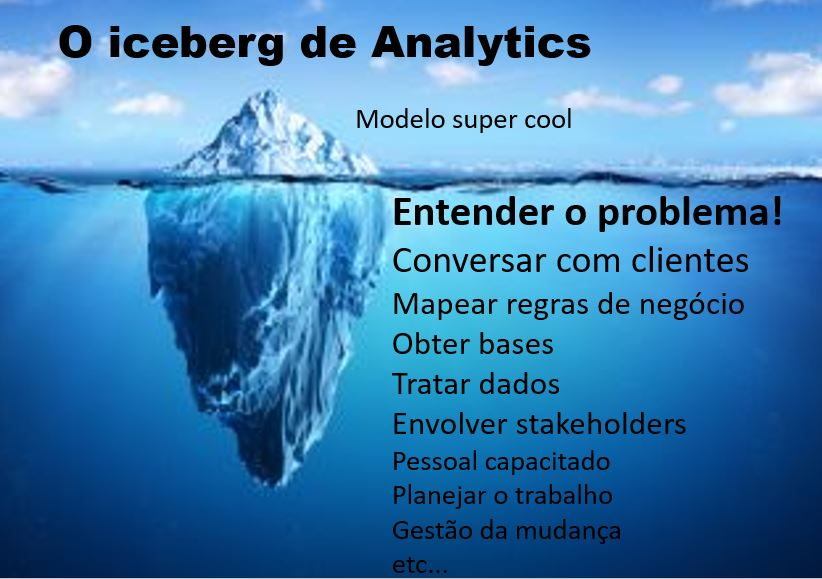

A tabela Cobranca_transação contém aproximadamente 60 milhões de entradas individuais distribuídas em 30 colunas e mais de 2 milhões de linhas. Essa tabela é apenas uma dentre as 90 existentes e faz parte do conjunto de 55 pastas de dados cruzados pelo radar:  

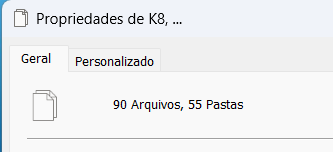

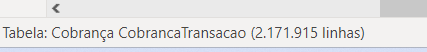

No Radar, utilizamos as seguintes linguagens de programação: `SQL` para extração dos dados, `M`, `Python` e `Dax` para a logística e análise dos dados, e para validação, utilizaremos todas as linguagens, além de VBA. Em todas essas linguagens, se houver uma vírgula fora do lugar no código, pode haver inconsistência na resposta. Por isso, é um trabalho que exige várias etapas de validação cruzadas em múltiplas linguagens até que se apresente a resposta alvo.

Uma novidade é que integramos ao processo o poder da inteligência artificial `Chat GPT` como ferramenta. Com isso, esperamos tornar o processo mais rapido eficiente e preciso.

## Regras de Negócio

Na fase atual ainda estamos entendendo o fluxo da informação e regras de negócio, até agora tenho o seguinte mapeamento:

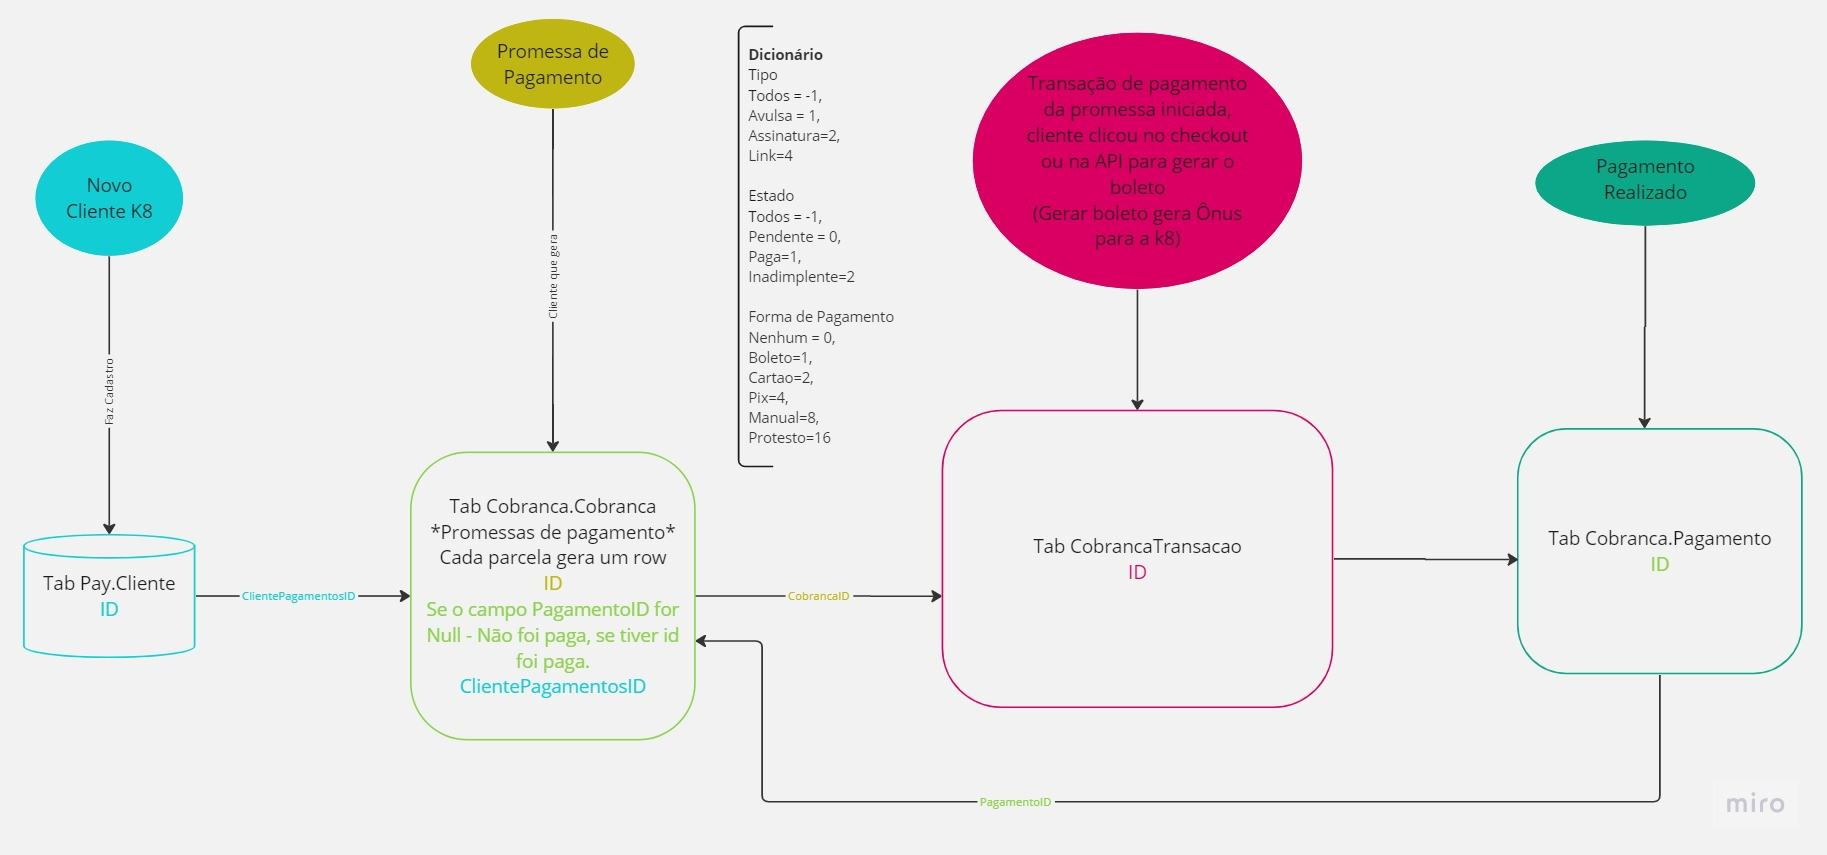

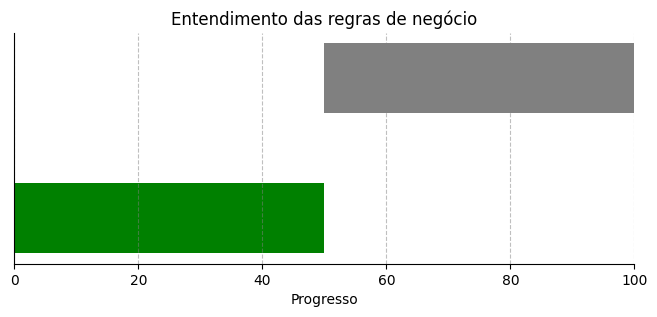

In [6]:
# Entendimento das regras de negócio
import matplotlib.pyplot as plt

def loading_bar_horizontal(progress, total):
    fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
    ax.barh('Progresso', progress, color='green', height=0.5, left=0)
    ax.barh('Total', total - progress, color='gray', height=0.5, left=progress)
    ax.set_xlim([0, total])
    ax.set_xlabel('Progresso')
    ax.set_title('Entendimento das regras de negócio')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_visible(False)
    ax.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)
    plt.show()

# Exemplo de uso
total_progress = 100
progress = 50

loading_bar_horizontal(progress, total_progress)





Depois de estabelecermos as regras de negócios, configuramos uma integração automatizada entre o Power BI e o SharePoint para que os novos dados sejam carregados automaticamente. Antes disso, passamos por uma grande etapa de validação no Excel para corrigir um problema na consulta SQL. Com a ajuda do Edson, aplicamos uma metodologia para organizar as consultas, garantindo que os dados sejam enviados corretamente para o Power BI ao serem colados no SharePoint.

Os dados foram carregados no PBI usando a linguagem M e foi realizado um estudo e trabalho para integrar o Python ao POWERBI, trazendo uma grande notícia em tecnologia para a empresa. Agora, a K8 tem a capacidade de utilizar o Python dentro do POWERBI, combinando todo o poder gráfico do POWERBI com a capacidade de análise de dados do Python, `escalando exponecialmente` a nossa capacidade analítica e de ETL.

## Carregando os dados no POWERBI

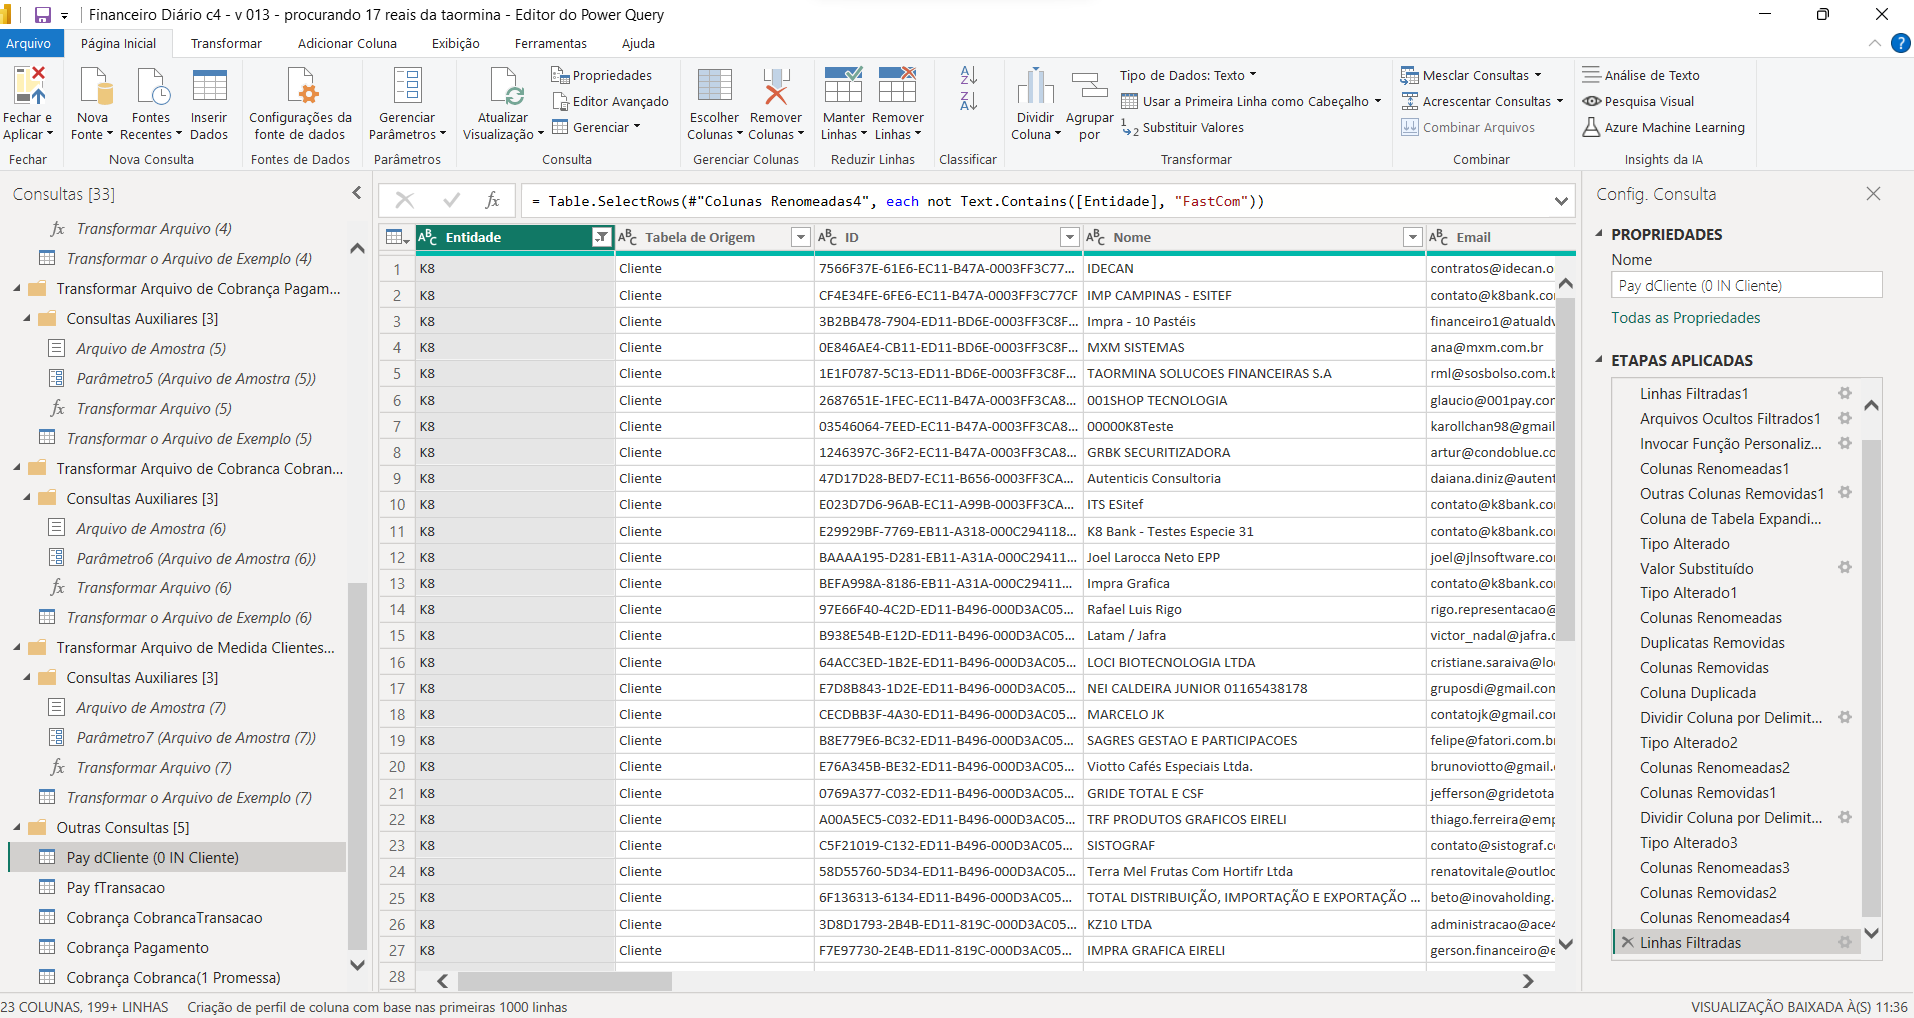

É possível notar, à esquerda, que várias consultas são estruturadas para cada tipo de tabela, enquanto à direita é evidente que várias fases de modelagem de dados são aplicadas para garantir a padronização necessária para a análise. Nessa etapa, trabalha-se com a tipagem e limpeza de dados, embora essa fase e seus códigos sejam executados em segundo plano e não sejam visíveis na entrega do dashboard. É importante destacar que essa fase é responsável pela maior parte do tempo investido no projeto, de 70 a 80% do tempo.